# Quick demo of CLIMADA

Authors: Chahan Kropf, Alessio Ciullo

GeoPython 2023, Basel

## Exposures

In [1]:
from climada.entity import LitPop

In [29]:
exp = LitPop.from_countries(countries=['BHS']);

2023-03-03 09:56:15,455 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-03-03 09:56:15,484 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-03-03 09:56:15,521 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-03-03 09:56:15,549 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-03-03 09:56:15,574 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-03-03 09:56:15,603 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-03-03 09:56:15,935 - climada.entity.exposures.litpop.gpw_populati

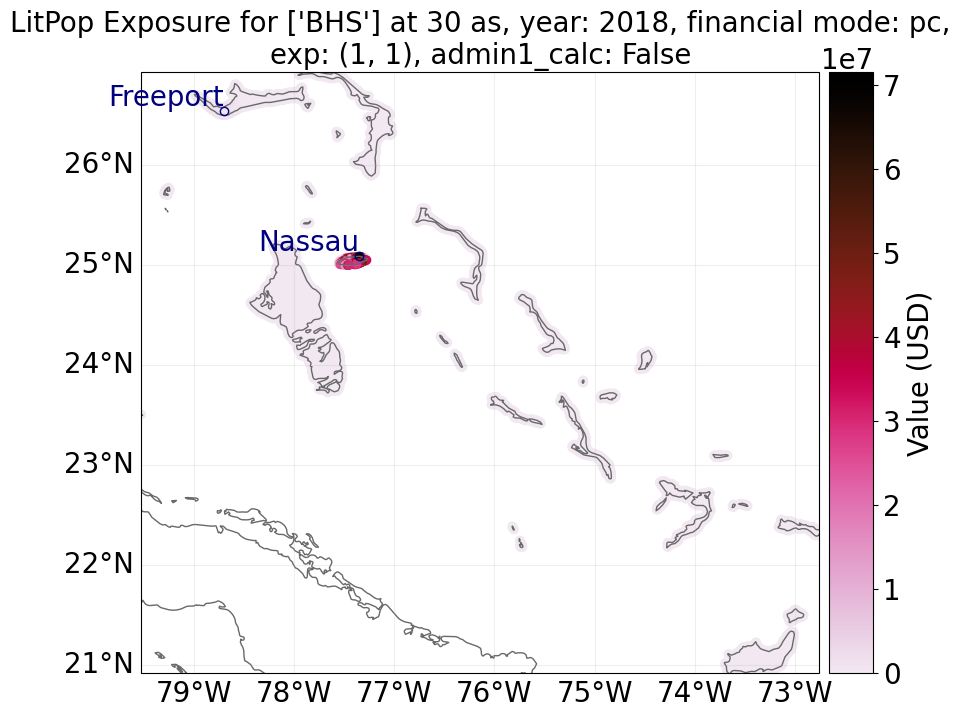

In [30]:
exp.plot_scatter();

<GeoAxesSubplot:>

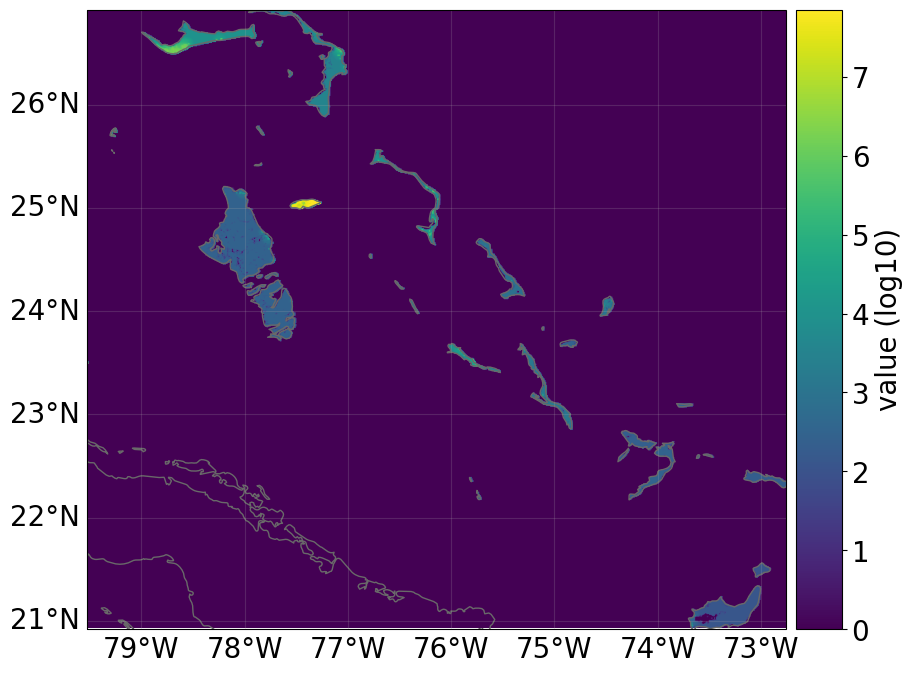

In [106]:
exp.plot_raster()

## Tropical Cyclones

2023-03-04 18:42:47,287 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2020-08-08 03:51:21 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /Users/ckropf/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2023-03-04 18:42:48,352 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2020-08-08 03:51:21 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /Users/ckropf/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


Text(0.5, 1.0, '2017-2018, NA')

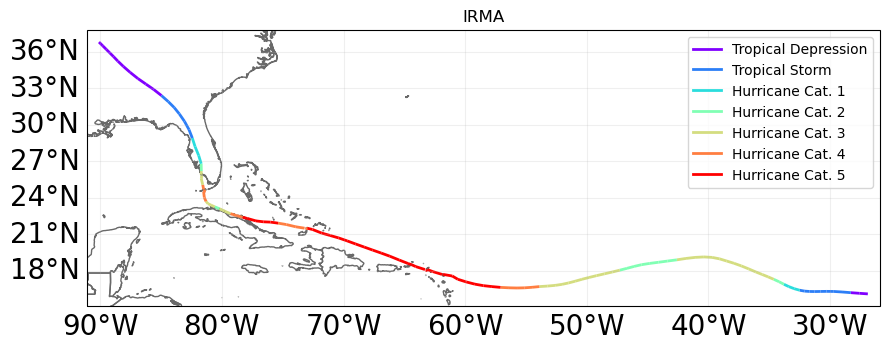

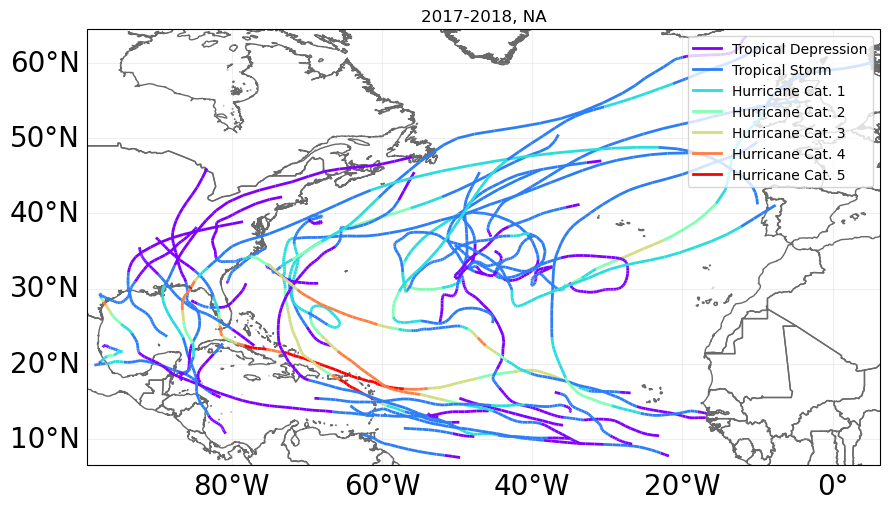

In [91]:
from climada.hazard import TCTracks

tr_irma = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
ax = tr_irma.plot();
ax.set_title('IRMA') # set title

na_2017 = TCTracks.from_ibtracs_netcdf(year_range=(2017, 2018), basin='NA')
ax = na_2017.plot();
ax.set_title('2017-2018, NA') # set title

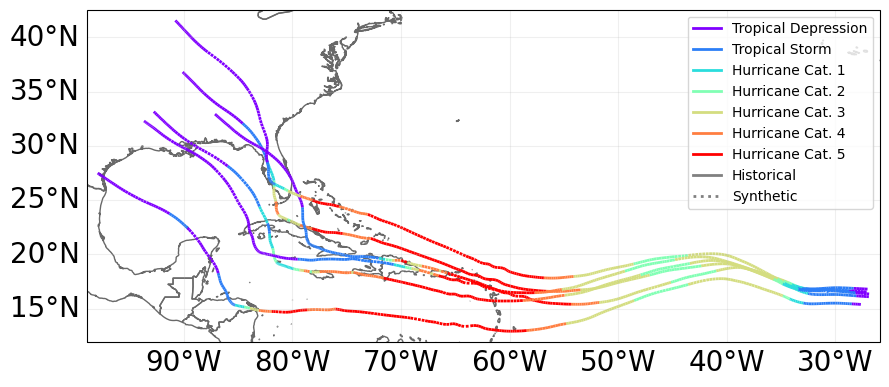

In [22]:
tr_irma.equal_timestep()
tr_irma.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_irma.plot();

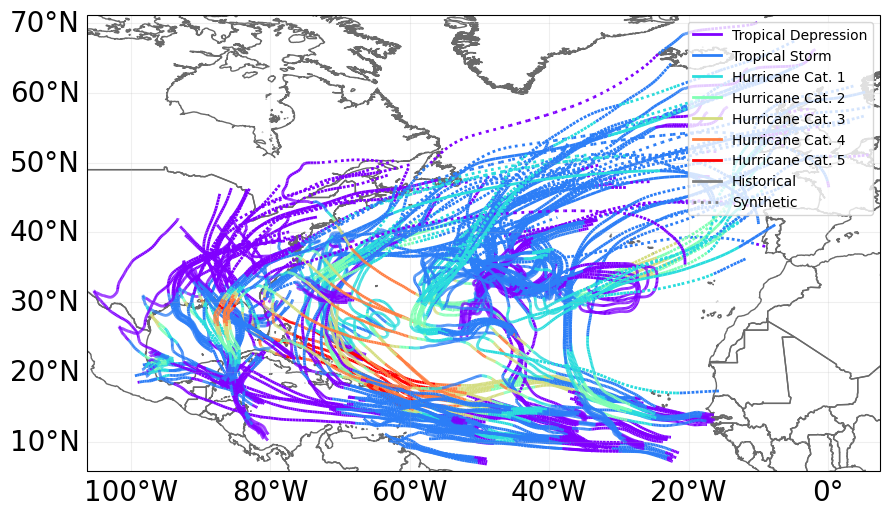

In [21]:
na_2017.equal_timestep()
na_2017.calc_perturbed_trajectories(nb_synth_tracks=5)
na_2017.plot();

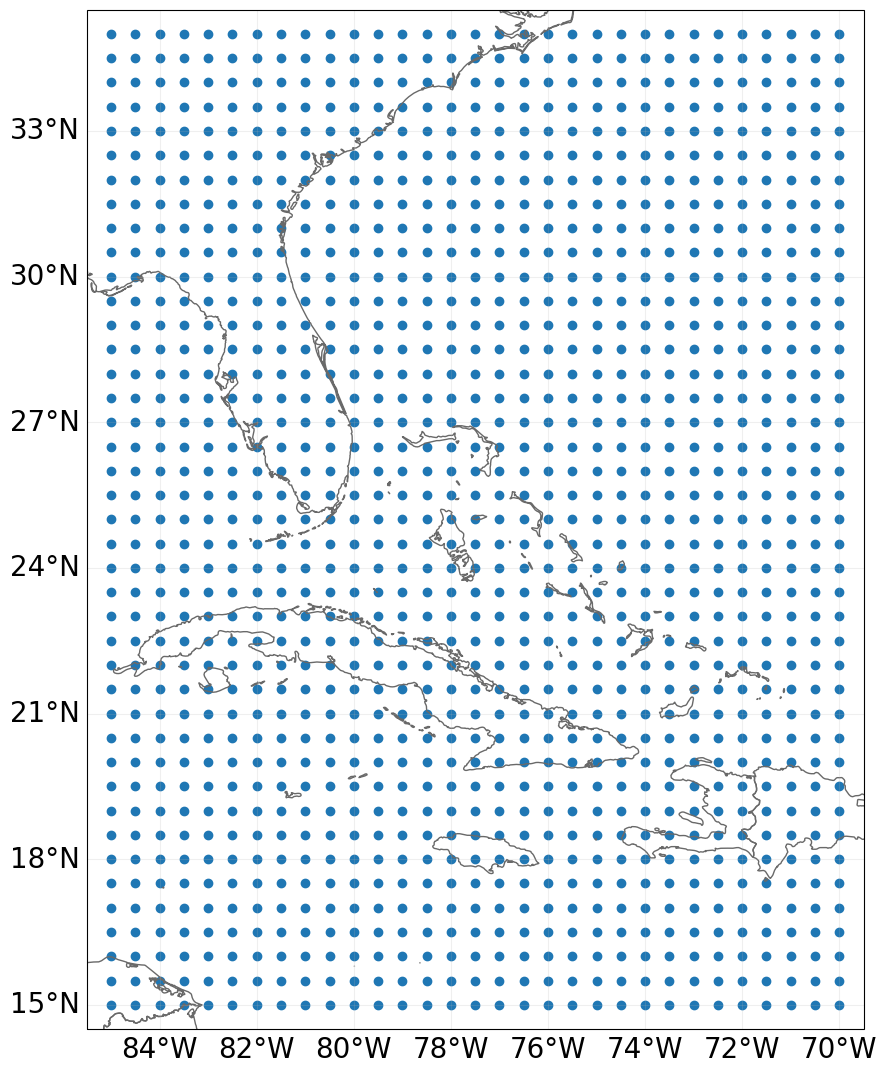

In [92]:
from climada.hazard import Centroids

# construct centroids
min_lat, max_lat, min_lon, max_lon = 15, 35, -85, -70
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.5)
cent.plot();

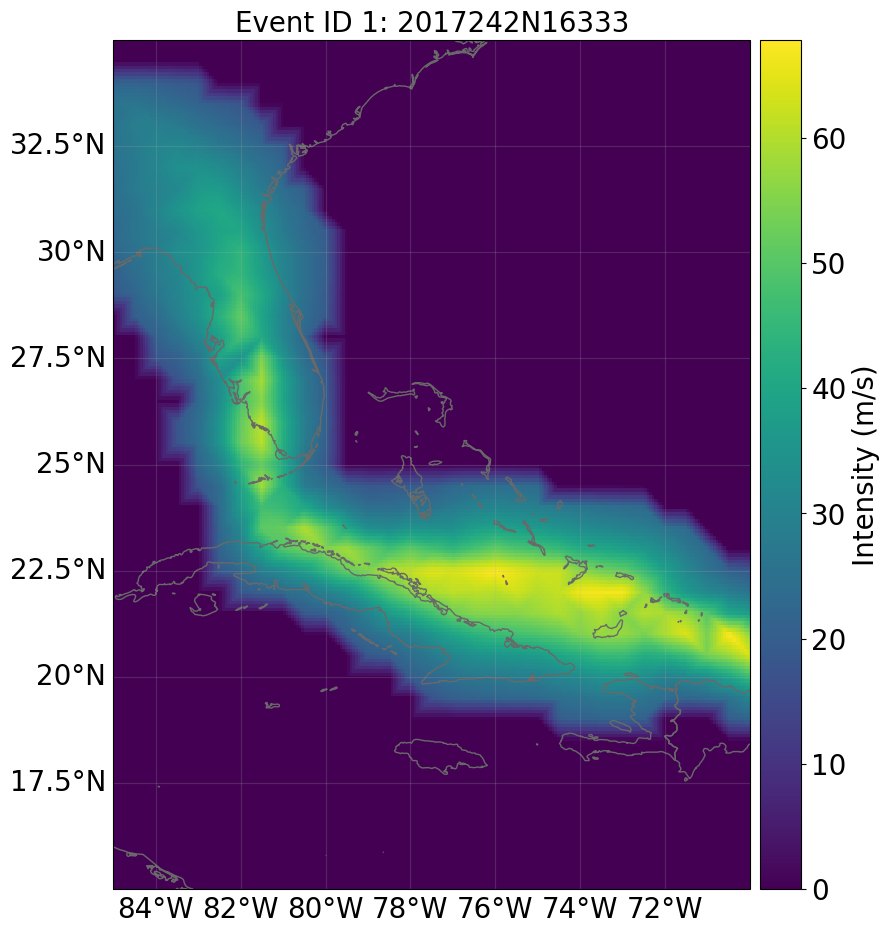

In [94]:
from climada.hazard import TropCyclone

# construct tropical cyclones
tc_irma = TropCyclone.from_tracks(tr_irma, centroids=cent)
tc_irma.plot_intensity('2017242N16333');  # IRMA

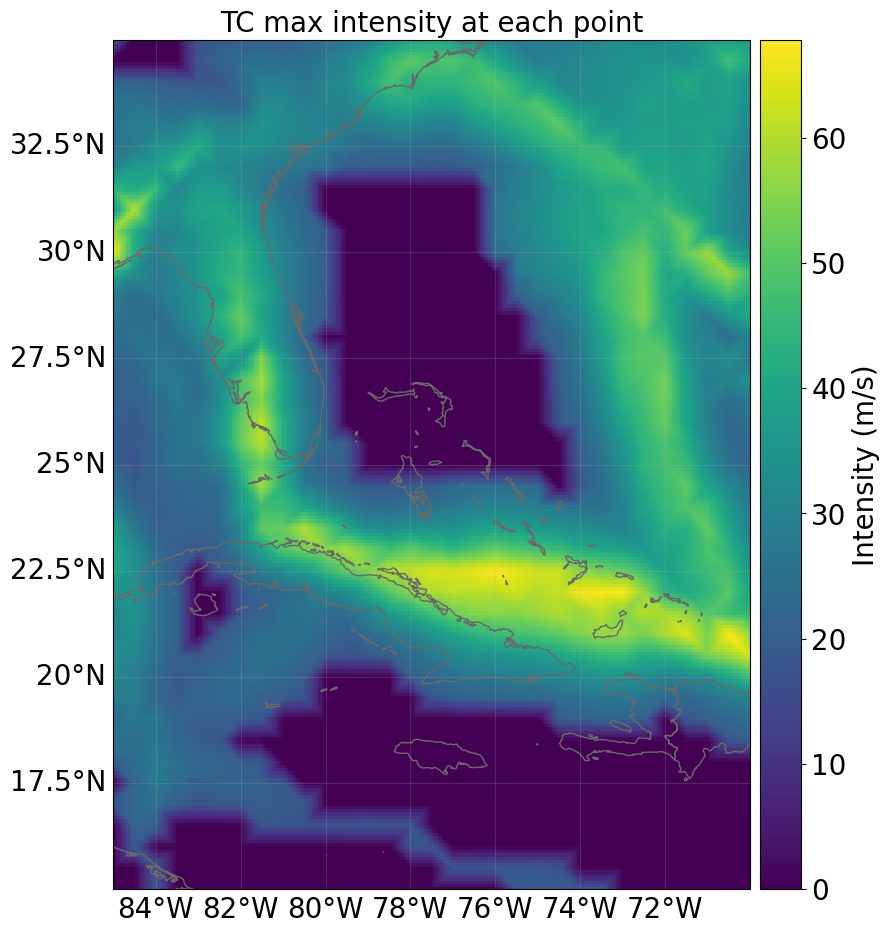

In [93]:
from climada.hazard import TropCyclone

# construct tropical cyclones
tc_na_2017 = TropCyclone.from_tracks(na_2017 , centroids=cent)
tc_na_2017 .plot_intensity(0);  # IRMA

## Vulneratiblity (impact function) 

<AxesSubplot:title={'center':'TC 1: Emanuel 2011'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

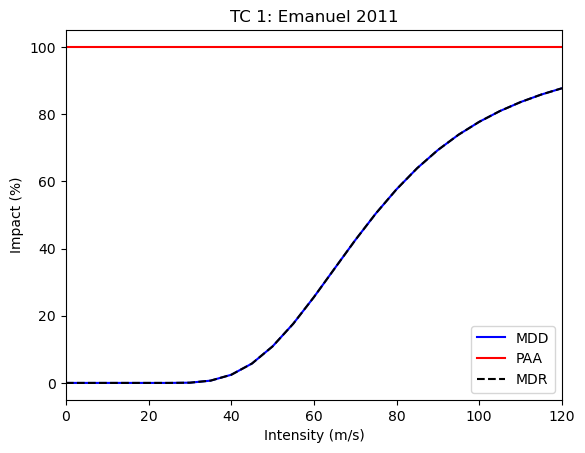

In [95]:
from climada.entity.impact_funcs.trop_cyclone import ImpfTropCyclone
from climada.entity import ImpactFuncSet

impf_tc = ImpfTropCyclone.from_emanuel_usa()

impfset_tc = ImpactFuncSet([impf_tc])
impfset_tc.plot()

## Impact 

In [60]:
from climada.engine import ImpactCalc

impcalc = ImpactCalc(exp, impfset_tc, tc_na_2017)
impact = impcalc.impact()

<GeoAxesSubplot:title={'center':'Expected annual impact'}>

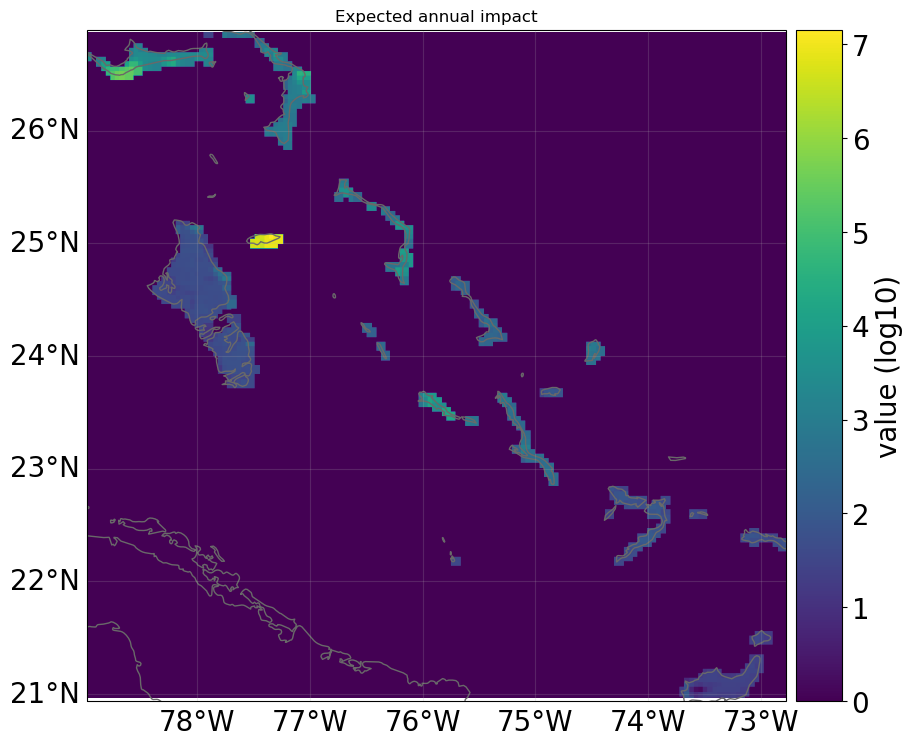

In [96]:
impact.plot_raster_eai_exposure()

In [69]:
import numpy as np
print(f'The average expected annual impact for \
      the Bahamas based on the historical climate is {np.round(impact.aai_agg)} USD')

The average expected annual impact for the Bahamas based on the historical climate is 550076766.0 USD


<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

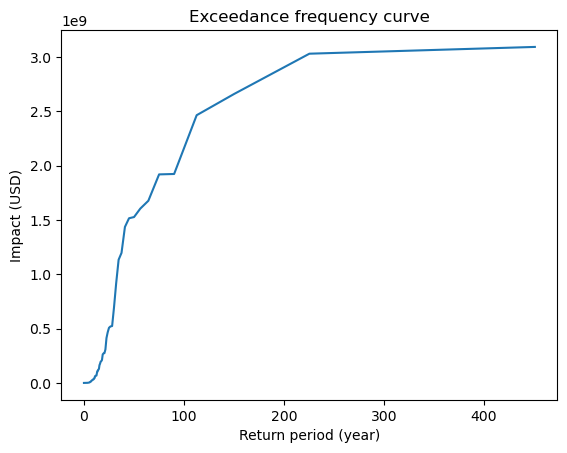

In [100]:
freq_curve = impact.calc_freq_curve();
freq_curve.plot()

## Use of the API - TC in 2040 with warming scenario RCP4.5

In [70]:
from climada.util.api_client import Client

In [71]:
client = Client()

In [72]:
exp = client.get_litpop('BHS')

https://climada.ethz.ch/data-api/v1/dataset	country_name=Bahamas	data_type=litpop	exponents=(1,1)	limit=100000	name=None	status=active	version=None


In [81]:
haz = client.get_hazard(
    'tropical_cyclone',
    properties={'country_name': 'Bahamas', 'climate_scenario': 'rcp45', 'ref_year':'2040'})

https://climada.ethz.ch/data-api/v1/dataset	climate_scenario=rcp45	country_name=Bahamas	data_type=tropical_cyclone	limit=100000	name=None	ref_year=2040	status=active	version=None


In [82]:
impcalc = ImpactCalc(exp, impfset_tc, haz)

In [83]:
impact = impcalc.impact()

In [84]:
print(f'The average expected annual impact for\
    the Bahamas based on the historical climate is {np.round(impact.aai_agg)} USD')

The average expected annual impact for the Bahamas based on the historical climate is 73697173.0 USD
